In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# to create maps
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [209]:
df = pd.read_csv("test_dataset.csv")
df

,damage,xcentroid,ycentroid
0,0.983051,-95.016602,29.665600
1,1.125000,-95.016342,29.816284
2,1.000000,-95.016624,29.738960
3,1.991242,-95.017288,29.911316
4,1.000000,-95.017899,29.728025
...,...,...,...
126753,1.282700,-95.685295,29.858055
126754,0.993492,-95.685791,29.807676
126755,1.000000,-95.685898,29.867290
126756,1.300362,-95.686241,29.785889


In [210]:
# Dimension of dataset
df.shape

(126758, 3)

In [211]:
df.isnull().sum()

damage       0
xcentroid    0
ycentroid    0
dtype: int64

In [212]:
# Geojson file
texas = gpd.read_file("texas.geojson")
texas.head()

,name,source,shape_area,date_modif,stratmap_i,txdot_abbr,shape_leng,date_retir,date_creat,cog_abbr,local_id,fips_code,geometry
0,Dallam,DRG,0.391036107,None,,004,2.6477391005,None,1964-01-01 08:00:00+00:00,113,113,111,"MULTIPOLYGON (((-102.53963 36.05514, -102.5834..."
1,Sherman,DRG,0.23975713465,None,,004,1.96801050936,None,1963-01-01 08:00:00+00:00,113,113,421,"MULTIPOLYGON (((-101.62344 36.05539, -101.6341..."
2,Hansford,DRG,0.23918797085,None,,004,1.96553456688,None,1973-01-01 08:00:00+00:00,113,113,195,"MULTIPOLYGON (((-101.08517 36.49986, -101.0851..."
3,Ochiltree,DRG,0.23882832265,None,,004,1.96733065435,None,1972-01-01 08:00:00+00:00,113,113,357,"MULTIPOLYGON (((-100.54607 36.45957, -100.5461..."
4,Lipscomb,DRG,0.24239659585,None,,004,1.97981554464,None,1972-01-01 08:00:00+00:00,113,113,295,"MULTIPOLYGON (((-100.54020 36.05599, -100.5462..."


In [57]:
type(texas)

geopandas.geodataframe.GeoDataFrame

In [213]:
sns.set_theme(palette="pastel")

<AxesSubplot:>

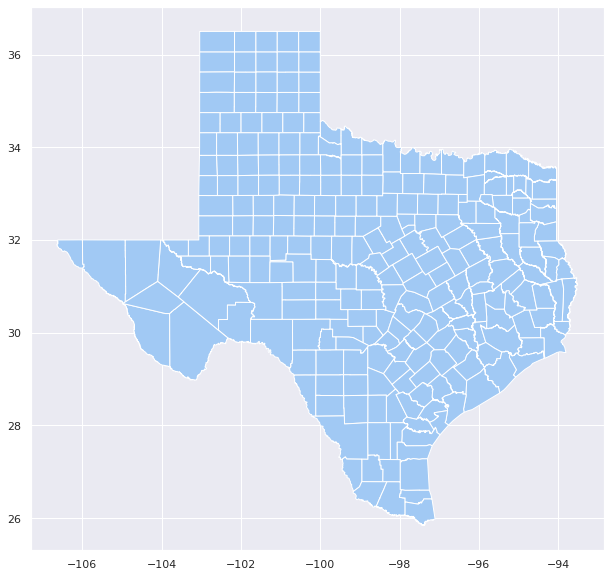

In [214]:
# Texas Map
texas.plot(figsize=(20,10))

In [215]:
# Combining Lattitude and Longitude to create hurricane coordinates:
df['coordinates'] = df[['xcentroid', 'ycentroid']].values.tolist()
df.head()

,damage,xcentroid,ycentroid,coordinates
0,0.983051,-95.016602,29.665600,"[-95.016602, 29.6656]"
1,1.125000,-95.016342,29.816284,"[-95.01634200000001, 29.816284000000003]"
2,1.000000,-95.016624,29.738960,"[-95.016624, 29.73896]"
3,1.991242,-95.017288,29.911316,"[-95.017288, 29.911315999999996]"
4,1.000000,-95.017899,29.728025,"[-95.017899, 29.728025]"


In [216]:
# Change the coordinates to a geoPoint
df['coordinates'] = df['coordinates'].apply(Point)
df.head()

,damage,xcentroid,ycentroid,coordinates
0,0.983051,-95.016602,29.665600,POINT (-95.016602 29.6656)
1,1.125000,-95.016342,29.816284,POINT (-95.01634200000001 29.816284000000003)
2,1.000000,-95.016624,29.738960,POINT (-95.016624 29.73896)
3,1.991242,-95.017288,29.911316,POINT (-95.017288 29.911315999999996)
4,1.000000,-95.017899,29.728025,POINT (-95.017899 29.728025)


In [217]:
# Convert the count df to geodf
df = gpd.GeoDataFrame(df, geometry='coordinates')
df.head()

,damage,xcentroid,ycentroid,coordinates
0,0.983051,-95.016602,29.665600,POINT (-95.01660 29.66560)
1,1.125000,-95.016342,29.816284,POINT (-95.01634 29.81628)
2,1.000000,-95.016624,29.738960,POINT (-95.01662 29.73896)
3,1.991242,-95.017288,29.911316,POINT (-95.01729 29.91132)
4,1.000000,-95.017899,29.728025,POINT (-95.01790 29.72802)


In [218]:
type(df)

geopandas.geodataframe.GeoDataFrame

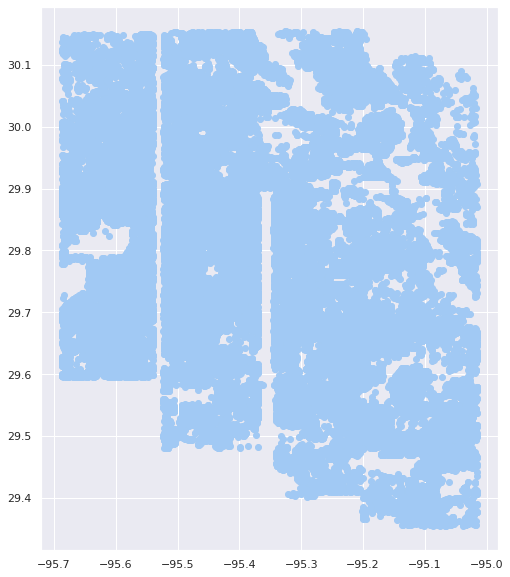

In [90]:
df.plot(figsize=(20,10));

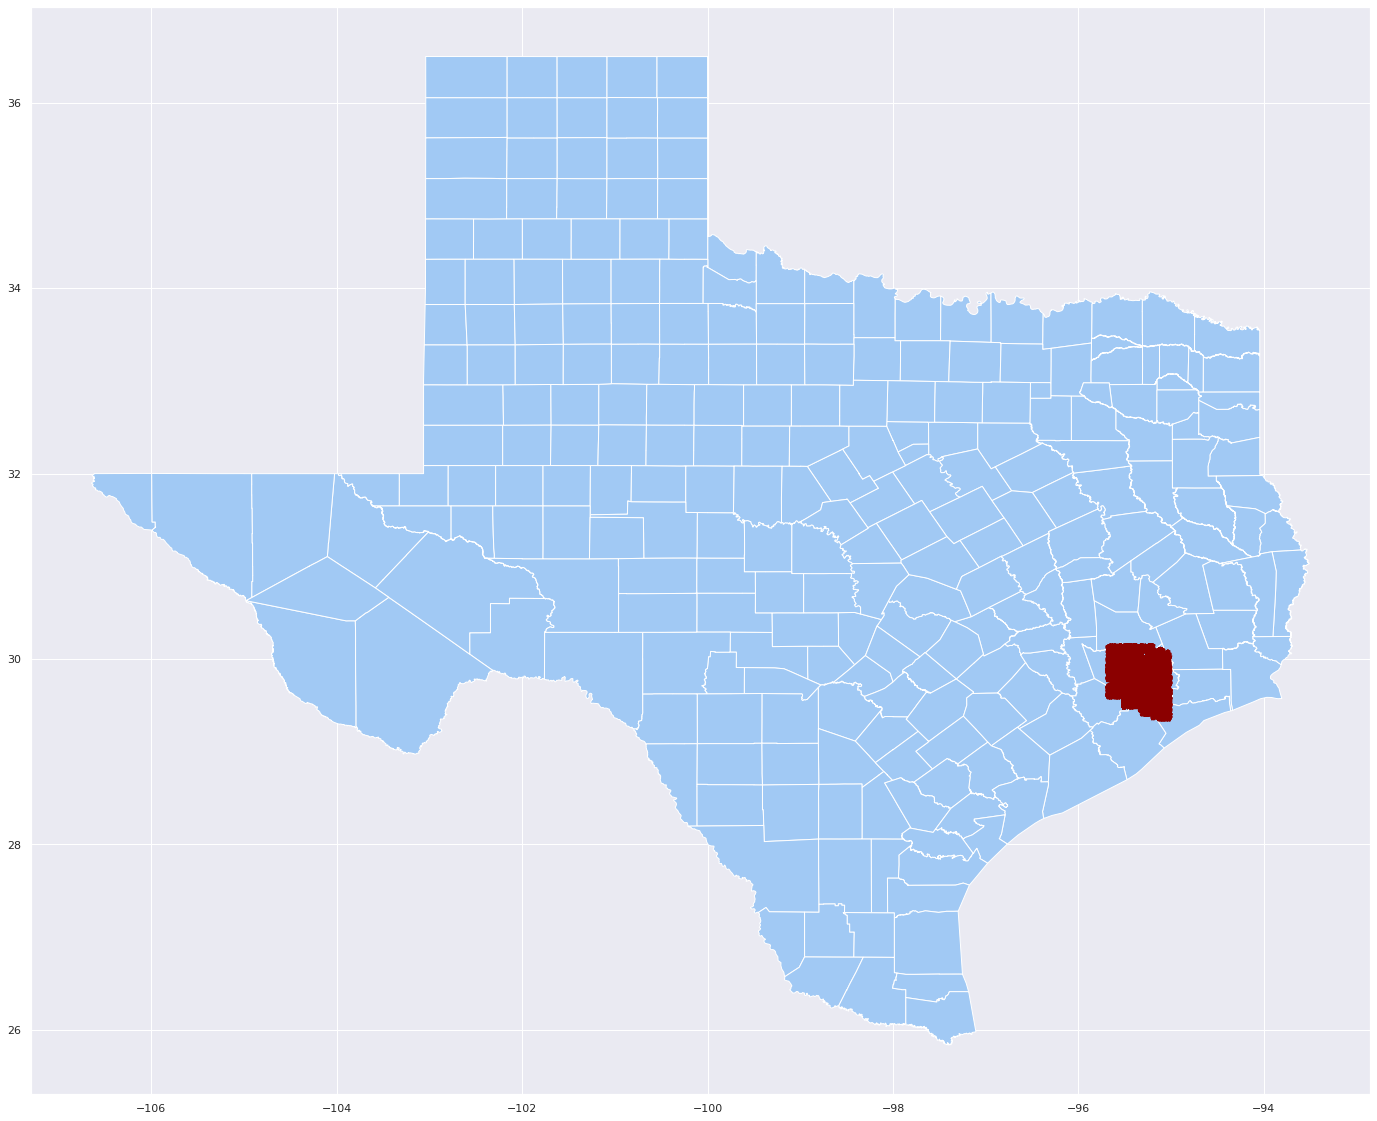

In [219]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = texas.plot(ax=ax)

# plotting the hurricane position on top with red color to stand out:
df.plot(ax=base, color='darkred', marker="*", markersize=10);

In [80]:
texas.name.unique()

array(['Dallam', 'Sherman', 'Hansford', 'Ochiltree', 'Lipscomb',
       'Red River', 'Montague', 'Lamar', 'Hartley', 'Moore', 'Hutchinson',
       'Roberts', 'Grayson', 'Cooke', 'Fannin', 'Van Zandt', 'Kaufman',
       'Harrison', 'Hemphill', 'Oldham', 'Potter', 'Gregg', 'Smith',
       'Carson', 'Gray', 'Wheeler', 'Deaf Smith', 'Randall', 'Armstrong',
       'Donley', 'Collingsworth', 'Parmer', 'Castro', 'Swisher',
       'Briscoe', 'Hall', 'Childress', 'Hardeman', 'Wilbarger', 'Cottle',
       'Foard', 'Wichita', 'Clay', 'Andrews', 'Ellis', 'Hood', 'Martin',
       'Winkler', 'Johnson', 'Howard', 'Somervell', 'Hill', 'Comanche',
       'El Paso', 'Bosque', 'Cherokee', 'Hudspeth', 'Mitchell', 'Nolan',
       'Taylor', 'Callahan', 'Eastland', 'Erath', 'Panola', 'Rusk',
       'Navarro', 'Ector', 'Midland', 'Glasscock', 'Sterling', 'Reeves',
       'Coke', 'Loving', 'Runnels', 'Coleman', 'Culberson', 'Anderson',
       'Brown', 'Shelby', 'Freestone', 'Hamilton', 'Nacogdoches',
       'M

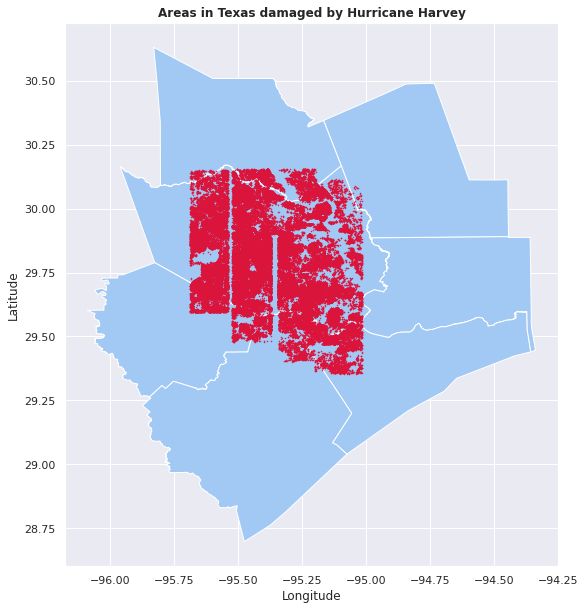

In [98]:
fig, ax = plt.subplots(1, figsize=(20,10))
base = texas[texas['name'].isin(['Harris','Montgomery','Fort Bend','Brazoria','Galveston', 'Chambers','Liberty'])].plot(ax=ax)

# Plotting Damage
df.plot(ax=base, color ='crimson', marker=".", markersize=1);


plt.title('Areas in Texas damaged by Hurricane Harvey', fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Used Texas Map: https://en.wikipedia.org/wiki/File:Texas_counties_map.png


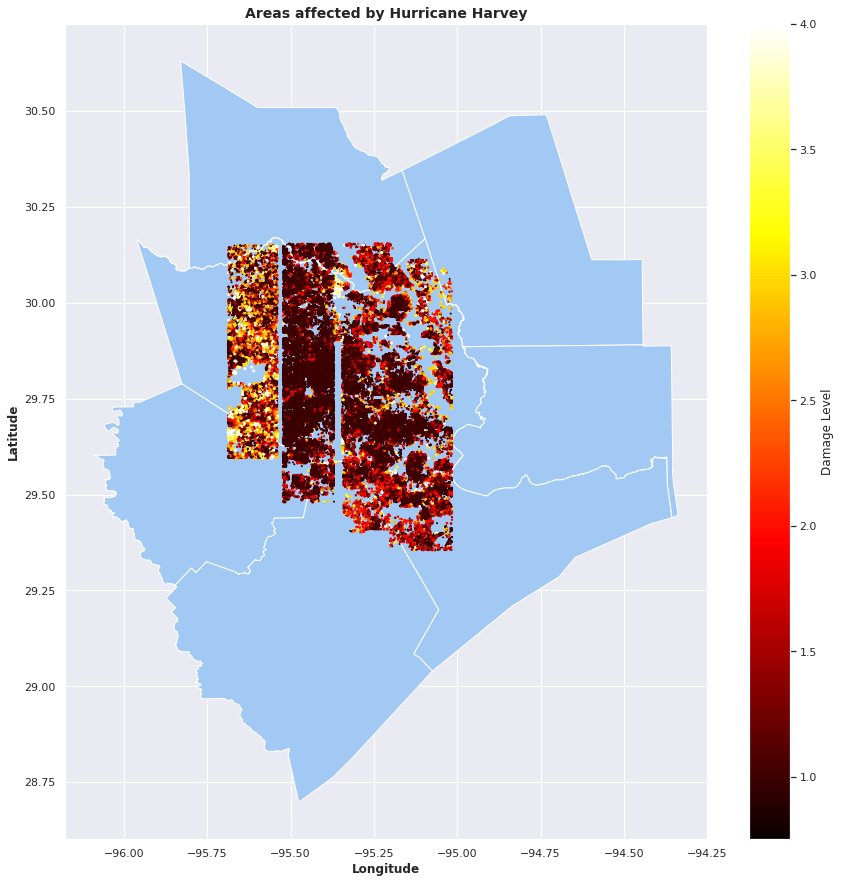

In [182]:
# Creating axes and plotting texas map
fig, ax = plt.subplots(1, figsize=(15,15))
base = texas[texas['name'].isin(['Harris','Montgomery','Fort Bend','Brazoria','Galveston', 'Chambers','Liberty'])].plot(ax=ax)

# Plotting Damage
x = df['xcentroid']
y = df['ycentroid']
z = df['damage']
plt.scatter(x, y,s=z,c=z,cmap='hot')
plt.colorbar(label='Damage Level')

plt.title('Areas affected by Hurricane Harvey', fontweight='bold', fontsize=14)
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.show()

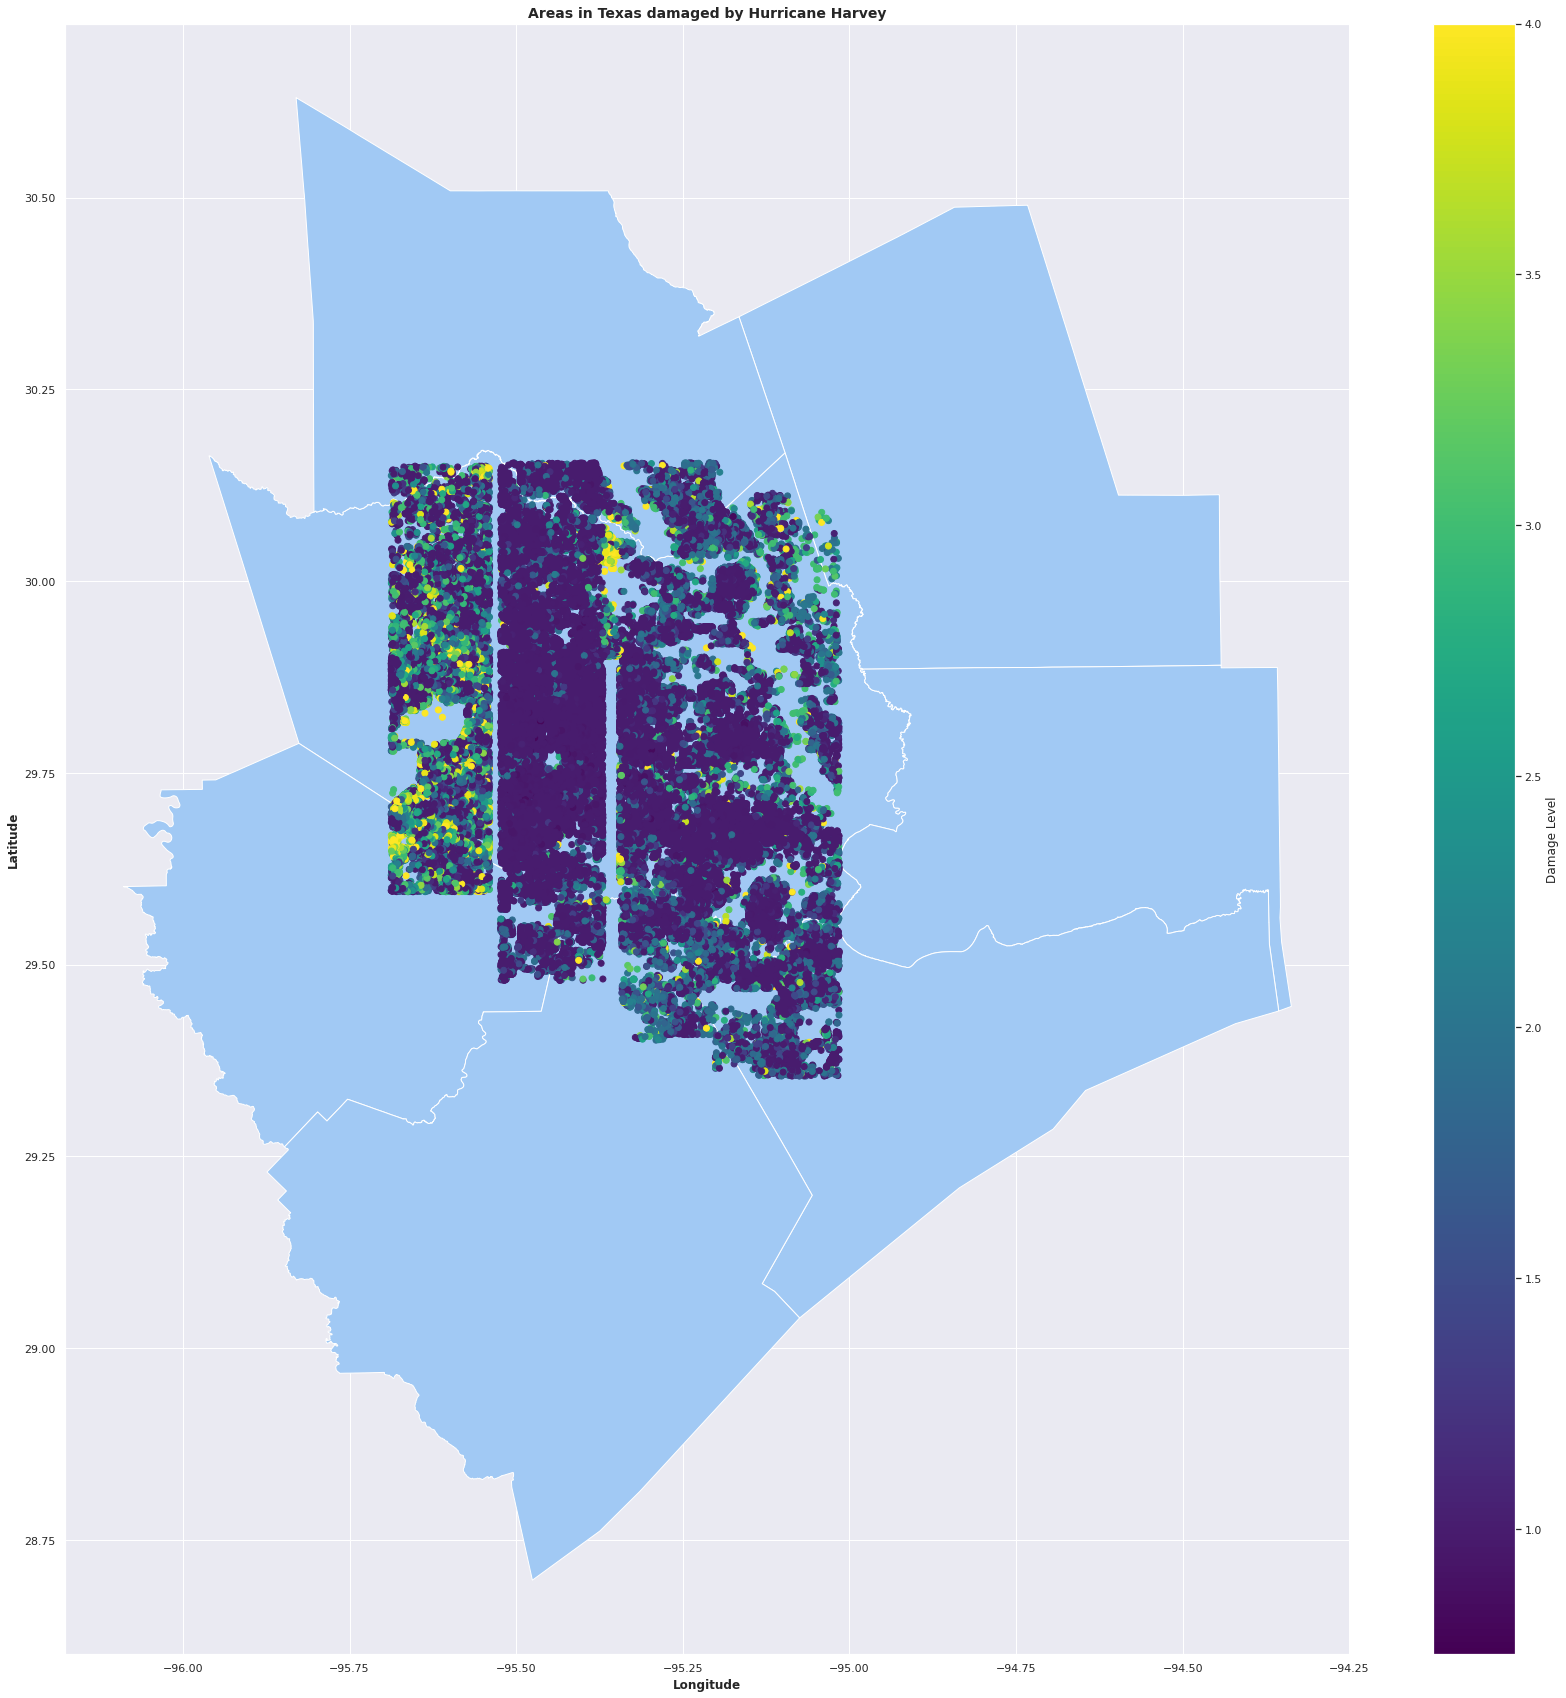

In [168]:

# Creating axes and plotting texas map
fig, ax = plt.subplots(1, figsize=(30,30))
base = texas[texas['name'].isin(['Harris','Montgomery','Fort Bend','Brazoria','Galveston', 'Chambers','Liberty'])].plot(ax=ax)

# Plotting Damage
x = df['xcentroid']
y = df['ycentroid']
z = df['damage']
plt.scatter(x, y,c=z, cmap='viridis')
plt.colorbar(label='Damage Level')

plt.title('Areas in Texas damaged by Hurricane Harvey', fontweight='bold', fontsize=14)
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.show()

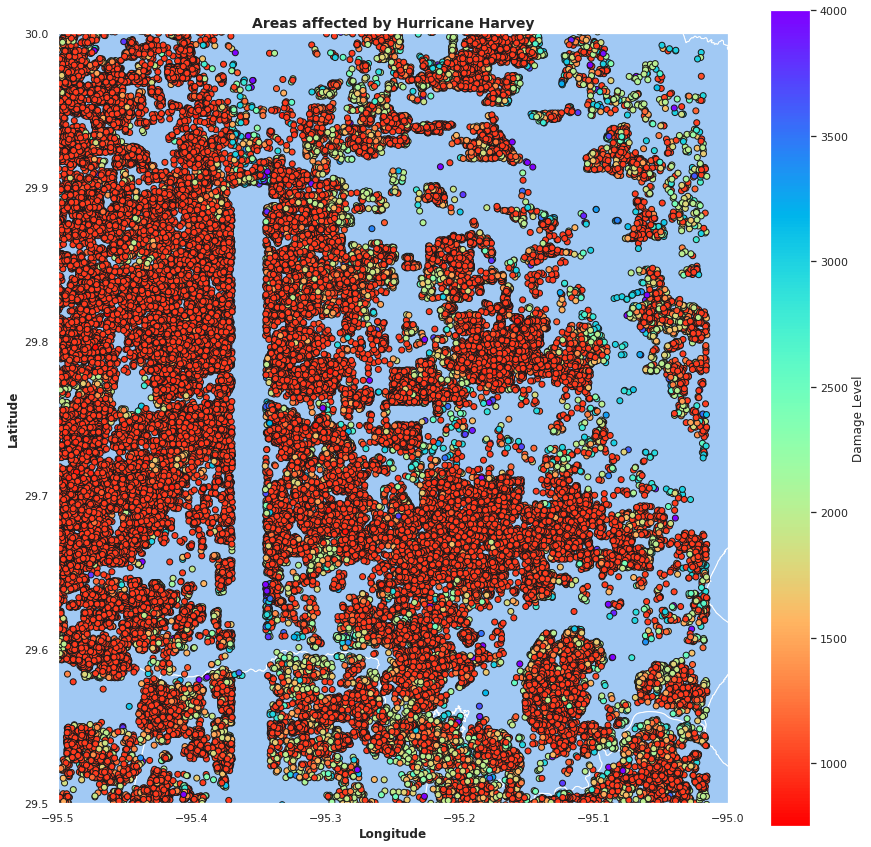

In [225]:
# Creating axes and plotting texas map
fig, ax = plt.subplots(1, figsize=(15,15))
base = texas[texas['name'].isin(['Harris','Montgomery','Fort Bend','Brazoria','Galveston', 'Chambers','Liberty'])].plot(ax=ax)

# Plotting Damage
x = df['xcentroid']
y = df['ycentroid']
z = df['damage']

# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('rainbow')
  
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()

plt.scatter(x, y,c=z*1000, cmap=reversed_map, edgecolor='k')
plt.colorbar(label='Damage Level')


plt.xlim(-95.50, -95.00)
plt.ylim(29.5, 30.0)



plt.title('Areas affected by Hurricane Harvey', fontweight='bold', fontsize=14)
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.show()